# COVID-19 testing

## Explorative Analysis

### Import Python packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime

### Read and filter

In [2]:
test = pd.read_csv('C:/Users/david/Downloads/covid_testing_data.csv')

country_cond = test['country'].isin(["Denmark", "Germany", "Romania", "Spain", "Sweden"])
level_cond = test['level'] == 'national'

test = (
    test[country_cond & level_cond]
    .drop(['level', 'region_name'], axis = 1)
)

### Data quality issues

Looking for anomalies/possible data quality issues due to data integrity and/or quality of input data sources:

In [3]:
# Two weeks presenting incorrect number of tests (and/or new cases)
test[test['new_cases'] > test['tests_done']]

,country,country_code,year_week,region,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
2787,Romania,RO,2020-W12,RO,294,2,19414458.0,0.010302,NaN,TESSy
2788,Romania,RO,2020-W13,RO,1327,12,19414458.0,0.061810,NaN,TESSy


In [4]:
# Exploring distribution of testing data sources for each country
pd.DataFrame(test.groupby('country_code')['testing_data_source'].value_counts().unstack().fillna(0))

testing_data_source,Country website,Other,Survey,TESSy
country_code,,,,
DE,0.0,0.0,0.0,45.0
DK,36.0,0.0,0.0,14.0
ES,0.0,23.0,0.0,14.0
RO,0.0,0.0,0.0,42.0
SE,10.0,0.0,13.0,28.0


### Preprocessing

- Retrieving month value for each observation to eventually achieve the desired aggregation
- Filtering on 2020 data

In [5]:
test['date'] = test.apply(lambda x: datetime.datetime.strptime(x['year_week'] + '-1', "%G-W%V-%u"), axis=1)
test['month'] = test.apply(lambda x: x.date.month, axis = 1)

test[['year', 'week']] = test['year_week'].str.split('-W', expand=True)
test = test[test.year == '2020']

test = test.drop('date', axis = 1)

# Check on DK data
test[test.country_code == 'DK']

,country,country_code,year_week,region,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,month,year,week
385,Denmark,DK,2020-W05,DK,0,3,5806081.0,0.051670,0.000000,Country website,1,2020,05
386,Denmark,DK,2020-W06,DK,0,4,5806081.0,0.068893,0.000000,Country website,2,2020,06
387,Denmark,DK,2020-W07,DK,0,4,5806081.0,0.068893,0.000000,Country website,2,2020,07
388,Denmark,DK,2020-W08,DK,0,9,5806081.0,0.155010,0.000000,Country website,2,2020,08
389,Denmark,DK,2020-W09,DK,4,337,5806081.0,5.804259,1.186944,Country website,2,2020,09
390,Denmark,DK,2020-W10,DK,34,805,5806081.0,13.864774,4.223602,Country website,3,2020,10
391,Denmark,DK,2020-W11,DK,837,4959,5806081.0,85.410452,16.878403,Country website,3,2020,11
392,Denmark,DK,2020-W12,DK,520,7352,5806081.0,126.625860,7.072905,Country website,3,2020,12
393,Denmark,DK,2020-W13,DK,1000,10025,5806081.0,172.663799,9.975062,Country website,3,2020,13
394,Denmark,DK,2020-W14,DK,1974,28264,5806081.0,486.799960,6.984149,Country website,3,2020,14


Let's now compute the monthly aggregation:

In [6]:
agg_df = test\
.groupby(['year','month', 'country', 'country_code'])\
.agg({'new_cases': 'sum', 'tests_done': 'sum', 'population': 'mean'})\
.reset_index()

In [8]:
# data quality issues with Romania in 2020-03 (much more cases than tests)
agg_df[agg_df['tests_done'] < agg_df['new_cases']]

,year,month,country,country_code,new_cases,tests_done,population
6,2020,3,Romania,RO,1621,14,19414458.0


Finally, let's compute monthly testing rate and positivity rate.

> N.B. Malformed row within RO data in 2020-03 is filtered out here.

In [9]:
agg_df['testing_rate'] = agg_df['tests_done'] / agg_df['population'] * 100
agg_df['positivity_rate'] = agg_df['new_cases'] / agg_df['tests_done'] * 100
agg_df['year_month'] = agg_df['year'] + '-' + agg_df['month'].astype('str')

# Data quality filtering
agg_df = agg_df[agg_df['positivity_rate'] <= 100]

### Visualization of results

In [10]:
plt.style.use('ggplot')

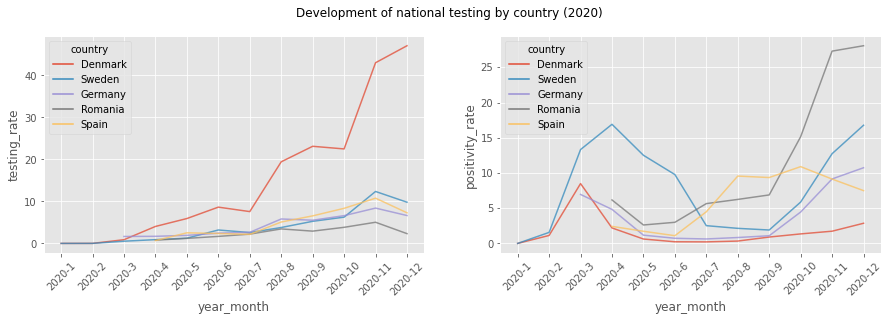

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

fig.suptitle('Development of national testing by country (2020)')
sns.lineplot(x = 'year_month', y = 'testing_rate', data = agg_df, hue = 'country', alpha = .75, ax=ax1)
sns.lineplot(x = 'year_month', y = 'positivity_rate', data = agg_df, hue = 'country', alpha = .75, ax=ax2);